In [2]:

import pandas as pd 
import pickle
import sys 
sys.path.append("C:/Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries")
import training_xgb_models as trainer


In [3]:
model_pickle_file = 'prophet_models_daily_2_10.pkl'

try:
    with open(f'data/models/{model_pickle_file}', 'rb') as file:
        prophet_models = pickle.load(file)

    print(f"Loaded sku len: {len(prophet_models)}")
    print(f"Loaded skus: {prophet_models}")
    print(type(prophet_models))
except:
    prophet_models= {}
s = []
for model_key, model in prophet_models.items():
    # Extract SKU from the model key (e.g., 'PSD6TL96YF9Z_mse' -> 'PSD6TL96YF9Z')
    sku = model_key.split('_')[0]
    s.append(sku)
s = list(set(s))

Loaded sku len: 300
Loaded skus: {'PSDX35CJQQXT_custom': <prophet.forecaster.Prophet object at 0x0000014039A1A2A0>, 'PSDX35CJQQXT_mse': <prophet.forecaster.Prophet object at 0x000001404CDE62A0>, 'PSDX35CJQQXT_huber_loss': <prophet.forecaster.Prophet object at 0x000001404CDE7A70>, 'PSDX35CJQQXT_poisson_loss': <prophet.forecaster.Prophet object at 0x000001404CE1D1C0>, 'PSDX35CJQQXT_mape': <prophet.forecaster.Prophet object at 0x000001404CE1E9C0>, 'PSDX35CJQQXT_remse': <prophet.forecaster.Prophet object at 0x000001404CE48230>, 'PSD8JNGGT2ZB_custom': <prophet.forecaster.Prophet object at 0x000001404CE499A0>, 'PSD8JNGGT2ZB_mse': <prophet.forecaster.Prophet object at 0x000001404CE4B620>, 'PSD8JNGGT2ZB_huber_loss': <prophet.forecaster.Prophet object at 0x000001404CE74E90>, 'PSD8JNGGT2ZB_poisson_loss': <prophet.forecaster.Prophet object at 0x000001404CE766C0>, 'PSD8JNGGT2ZB_mape': <prophet.forecaster.Prophet object at 0x000001404CE77DD0>, 'PSD8JNGGT2ZB_remse': <prophet.forecaster.Prophet objec

In [4]:
skus_to_model_path =  "Data/currated/skus_to_be_modeled_2_10.pkl"
try:
    with open(f'{skus_to_model_path}', 'rb') as file:
        sku_to_model = pickle.load(file)

    print(f"Loaded sku len: {len(sku_to_model)}")
    print(f"Loaded skus: {sku_to_model}")
    print(type(sku_to_model))
except Exception as e:
    print(e)
    sku_to_model = []


Loaded sku len: 50
Loaded skus: ['PSDGLCRTWXC4', 'PSDC9FX9TH5V', 'PSDCF54V2TKG', 'PSDGFWMQCZCL', 'PSDQG6VWMMZV', 'PSDRZVCW8M36', 'PSD9TJN45ZFL', 'PSDQ8Z5JZLVM', 'PSDWKY269FGX', 'PSDZ66XTNWL8', 'PSDC8886WMZZ', 'PSDWLHH83Z5R', 'PSDZKF8NBH5Y', 'PSD8F689H89H', 'PSDHBJK5KMXH', 'PSDYGQ2FH553', 'PSDXZQRFV2GV', 'PSD8JNGGT2ZB', 'PSD9Y369LLY6', 'PSDR2J4XBVFC', 'PSDZZHZ6583N', 'PSDCKZ5HJTVT', 'PSD3CC3YVKR5', 'PSDGHY52544X', 'PSDWC2LWJJKJ', 'PSD9T5H3KJZ9', 'PSD9L59C3HX2', 'PSD5TGG3J4FZ', 'PSD6B28VJ233', 'PSDX35CJQQXT', 'PSDVY98HJBVN', 'PSD5TGG3JJVJ', 'PSDHRF54JQVX', 'PSDM29W2NH9Z', 'PSDFJ3TFV53J', 'PSDYT65JHBNK', 'PSDW2ZM8YFJ4', 'PSDCQ68TGM4N', 'PSDCX59NXJKT', 'PSD4FRY5C46Y', 'PSDRYF2HTVW4', 'PSDJYKCT3GBM', 'PSD3QK3YQCJ6', 'PSDTGCY8WBCL', 'PSDXY82RRJ2G', 'PSDL5FMCVWHQ', 'PSDFY9YGJ4F4', 'PSD25NRZYY2N', 'PSD35W2BN2XR', 'PSD9YBNBTH3N']
<class 'list'>


In [5]:
import json
import xgboost as xgb

# Load the saved config file
with open("data/models/xgb_models_4_6.pkl", "rb") as f:
    xgbmodels = pickle.load(f)


In [6]:
for i in sku_to_model:
    if i not in xgbmodels.keys():
        print('not in xgb')
    if i not in s:
        print('not in prophet')

In [7]:
train_df, test_df, prod, current_skus = trainer.load_data(create_test_train_split=False) 
test_df = test_df[test_df['purchase_date'] > train_df['purchase_date'].max() ]
hist_data = train_df[train_df['purchase_date']<= '2023-08-30']
preddictions = trainer.predict_future_advanced(test_df[test_df['sku'].isin(xgbmodels.keys())], 
                                                    xgbmodels,
                                                    history_data=hist_data,
                                                    test= True)

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:60: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  prod = cu.clean_prod(pd.read_csv('data/raw/prod.csv'))


In [8]:
import prophet_modeling as pm 

table = pm.predict(prophet_models, test_df)
table = table.reset_index(drop=True)

In [9]:
t = table.copy()
t['loss']=t['sku'].str.split('_',expand=True).iloc[:,1]
t['sku']=t['sku'].str.split('_',expand=True).iloc[:,0]
table_list = []

for sku, group_1 in preddictions.groupby('sku'):
    curr_group = group_1.copy().reset_index(drop=True) 
    curr_table = t[t['sku'] == sku]  
    l = {}
    for loss, group_2 in curr_table.groupby('loss'):
  
        curr_loss= group_2.loc[:,['yhat','sell_qty']].reset_index(drop=True)
      
        curr_loss[f'{loss}_yhat'] = curr_loss['yhat']
      
        curr_loss = curr_loss.reset_index(drop=True)  
        l[loss] = curr_loss[[f'{loss}_yhat']].reset_index(drop=True)
        x = pd.concat([curr_group, curr_loss[[f'{loss}_yhat']].reset_index(drop=True)], axis=1)
        
    curr_group = curr_group.assign(**l)
    group_1['sku'] = sku 
    table_list.append(curr_group)
complete_forcast = pd.concat(table_list).reset_index(drop=True)
complete_forcast

,sku,purchase_date,sell_qty,y_hat,custom,huber,mape,mse,poisson,remse
0,PSD25NRZYY2N,2024-10-26,0.0,0.761082,0.000000,0.000000,0.032074,0.585282,0.585282,0.585282
1,PSD25NRZYY2N,2024-10-27,0.0,0.307580,0.000000,0.039916,0.026521,0.585282,0.585282,0.585282
2,PSD25NRZYY2N,2024-10-28,0.0,0.054525,0.000000,0.157891,0.020968,0.585282,0.585282,0.585282
3,PSD25NRZYY2N,2024-10-29,0.0,0.054525,0.000000,0.144737,0.015415,0.585282,0.585282,0.585282
4,PSD25NRZYY2N,2024-10-30,0.0,-0.004986,0.000000,0.071575,0.009862,0.585282,0.585282,0.585282
...,...,...,...,...,...,...,...,...,...,...
2545,PSDZZHZ6583N,2024-12-11,0.0,0.002634,1.179597,1.056812,1.094438,1.069635,1.080260,1.132676
2546,PSDZZHZ6583N,2024-12-12,6.0,1.040350,1.133480,1.203653,1.243311,1.214303,1.227996,1.284254
2547,PSDZZHZ6583N,2024-12-13,1.0,1.040350,1.091359,1.115486,1.150715,1.127039,1.139029,1.189215
2548,PSDZZHZ6583N,2024-12-14,0.0,0.002634,1.053762,0.907239,0.939352,0.917849,0.926971,0.972647


In [12]:
pd.merge(complete_forcast,prod,'left', 'sku').groupby(['type']).agg({'sell_qty':'sum',
                                                                     'y_hat':'sum',
                                                                     'custom': 'sum',
                                                                     'huber': 'sum',
                                                                     'mape': 'sum',
                                                                     'mse': 'sum',
                                                                     'poisson':'sum',
                                                                     'remse':'sum'})

,sell_qty,y_hat,custom,huber,mape,mse,poisson,remse
type,,,,,,,,
Electrical,411.0,651.682068,767.680624,580.147207,567.477050,608.260732,650.849239,588.610322
"Electrical, Plumbing",184.0,96.899513,264.613361,238.253888,227.851296,285.319980,285.134266,285.375635
HVAC,1913.0,1476.780640,789.907158,563.517995,421.998560,562.046888,778.158069,588.831330
"HVAC, Electrical, Plumbing, Tools",30.0,45.628391,34.795913,21.784227,12.905171,34.795913,34.795913,34.795913
"HVAC, Plumbing",96.0,483.340973,223.539168,228.514136,218.790814,226.100921,225.667647,226.309807
Plumbing,54.0,289.777405,142.342388,133.250129,163.720619,156.509613,270.217145,159.391548


In [11]:
type_sales =pd.merge(complete_forcast,prod,'left', 'sku').groupby(['type','purchase_date']).agg({'sku':'first',
                                                                     'sell_qty':'sum',
                                                                     'y_hat':'sum',
                                                                     'custom': 'sum',
                                                                     'huber': 'sum',
                                                                     'mape': 'sum',
                                                                     'mse': 'sum',
                                                                     'poisson':'sum',
                                                                     'remse':'sum'}).reset_index()
type_sales

,type,purchase_date,sku,sell_qty,y_hat,custom,huber,mape,mse,poisson,remse
0,Electrical,2024-10-26,PSD9T5H3KJZ9,2.0,10.017053,15.177229,14.096773,14.944467,13.866016,14.261062,13.309822
1,Electrical,2024-10-27,PSD9T5H3KJZ9,8.0,15.039419,14.919566,12.257582,14.084473,12.700029,13.168458,12.125919
2,Electrical,2024-10-28,PSD9T5H3KJZ9,12.0,11.737339,15.415192,12.376158,14.966338,12.952442,13.494014,12.379605
3,Electrical,2024-10-29,PSD9T5H3KJZ9,18.0,15.490696,16.016452,13.462212,16.126722,14.168583,15.222119,13.479991
4,Electrical,2024-10-30,PSD9T5H3KJZ9,4.0,13.156692,15.983206,13.208154,15.096274,13.864933,13.794155,13.074250
...,...,...,...,...,...,...,...,...,...,...,...
301,Plumbing,2024-12-11,PSD25NRZYY2N,4.0,3.962040,3.234107,2.563257,3.738390,3.421966,5.169753,3.107652
302,Plumbing,2024-12-12,PSD25NRZYY2N,3.0,3.213513,2.919126,2.147174,3.949074,3.411398,5.646394,3.096981
303,Plumbing,2024-12-13,PSD25NRZYY2N,1.0,3.942650,3.056028,2.577839,3.476007,3.427483,5.791451,2.885347
304,Plumbing,2024-12-14,PSD25NRZYY2N,0.0,14.030437,3.287168,2.096153,3.611471,3.491015,4.940459,2.969078


In [75]:
import matplotlib.pyplot as plt 
def plot_predictions(train_df: pd.DataFrame, predictions: pd.DataFrame, model_type: str, category:str):
    """
    Plots actual vs. predicted sales quantity for different SKUs.
    
    Parameters:
        train_df (pd.DataFrame): Training dataset.
        predictions (pd.DataFrame): Model predictions.
        model_type (str): Type of model used (e.g., 'XGBoost', 'Random Forest').
    """
    for i in predictions[category].unique():
        x = predictions[predictions[category] == i]
        training_sku = train_df[train_df[category] == i][['purchase_date', 'sell_qty']].tail(60)
        
        plt.figure(figsize=(20, 6))
        plt.plot(x['purchase_date'], x['y_hat'], label='Predicted Sell Qty', linewidth=2,)
        plt.plot(x['purchase_date'], x['sell_qty'], label='Actual Sell Qty', linewidth=2,)
        plt.plot(training_sku['purchase_date'], training_sku['sell_qty'], label='Recent Trend', linestyle='--', linewidth=2, color='orange')
        plt.plot(x['purchase_date'], x['custom'], label='custom', linewidth=2)
        plt.plot(x['purchase_date'], x['huber'], label='huber', linewidth=2)
        plt.plot(x['purchase_date'], x['mape'], label='mape', linewidth=2)
        plt.plot(x['purchase_date'], x['remse'], label='remse', linewidth=2)
        plt.plot(x['purchase_date'], x['poisson'], label='poisson', linewidth=2)
        plt.xlabel('Date')
        plt.ylabel('Sell Quantity')
        plt.title(f'Actual vs Predicted Sales for SKU: {i}, Model: {model_type}')
        plt.legend()
        plt.grid(visible=True, linestyle='--', alpha=0.7)
        plt.show()

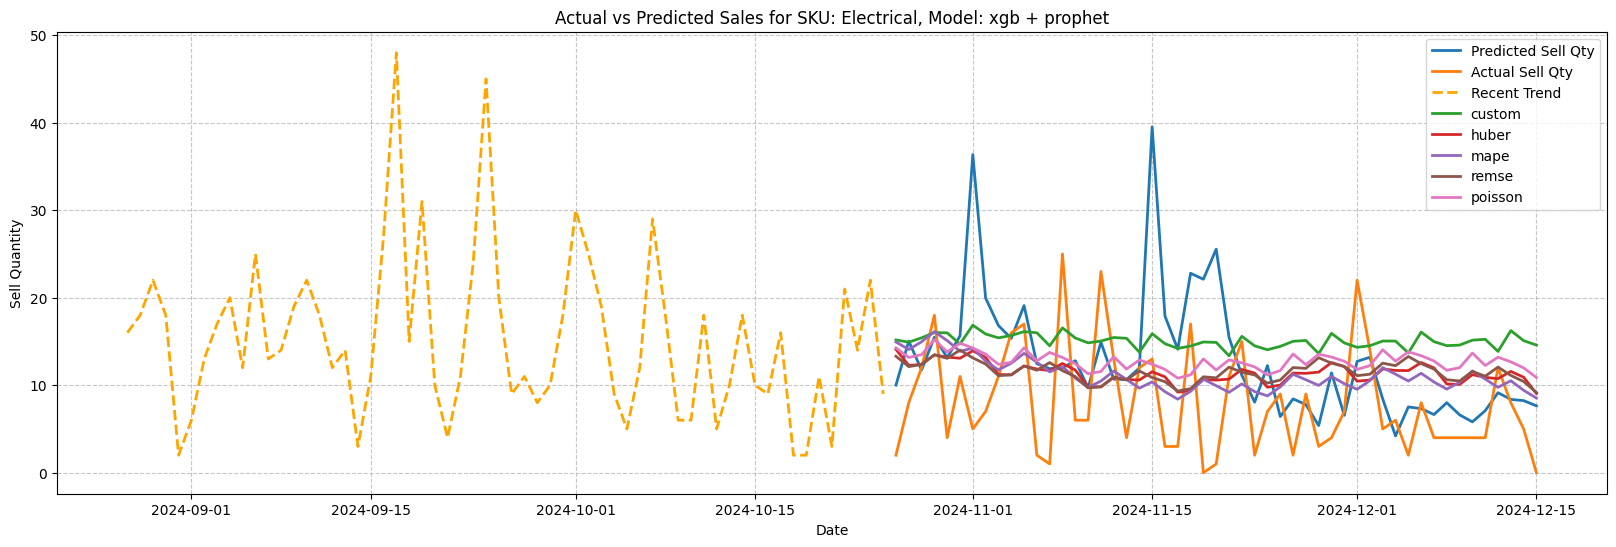

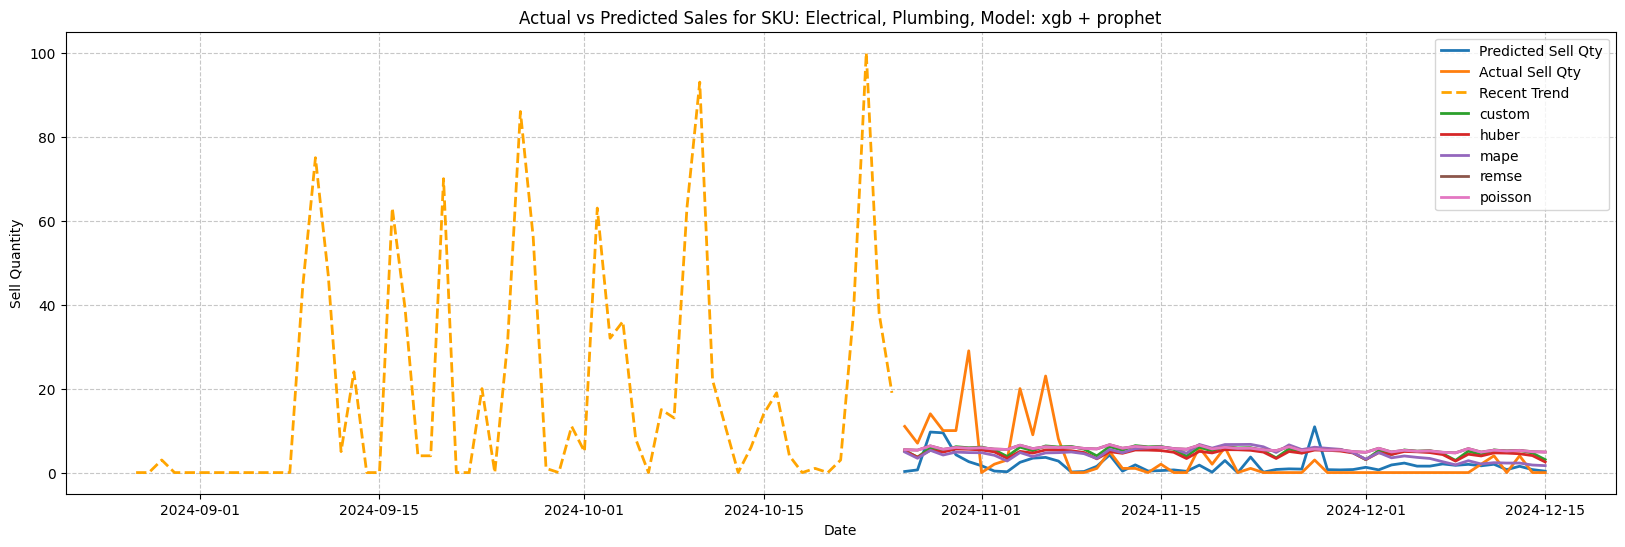

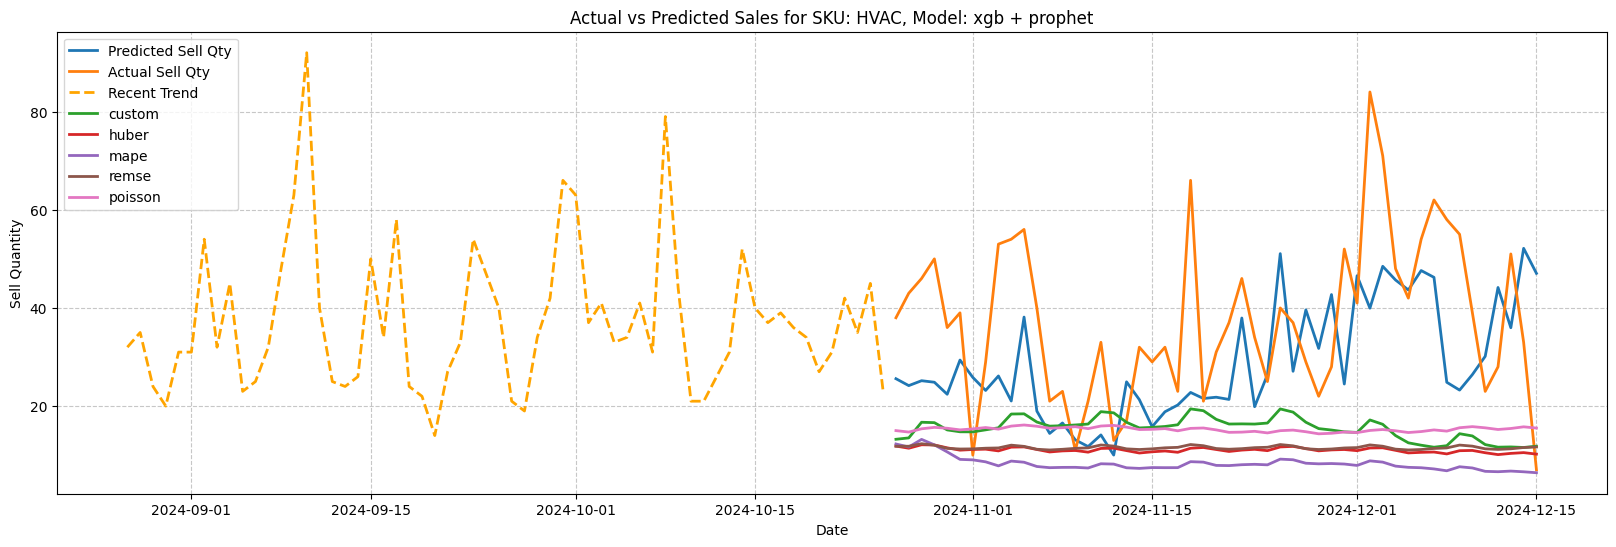

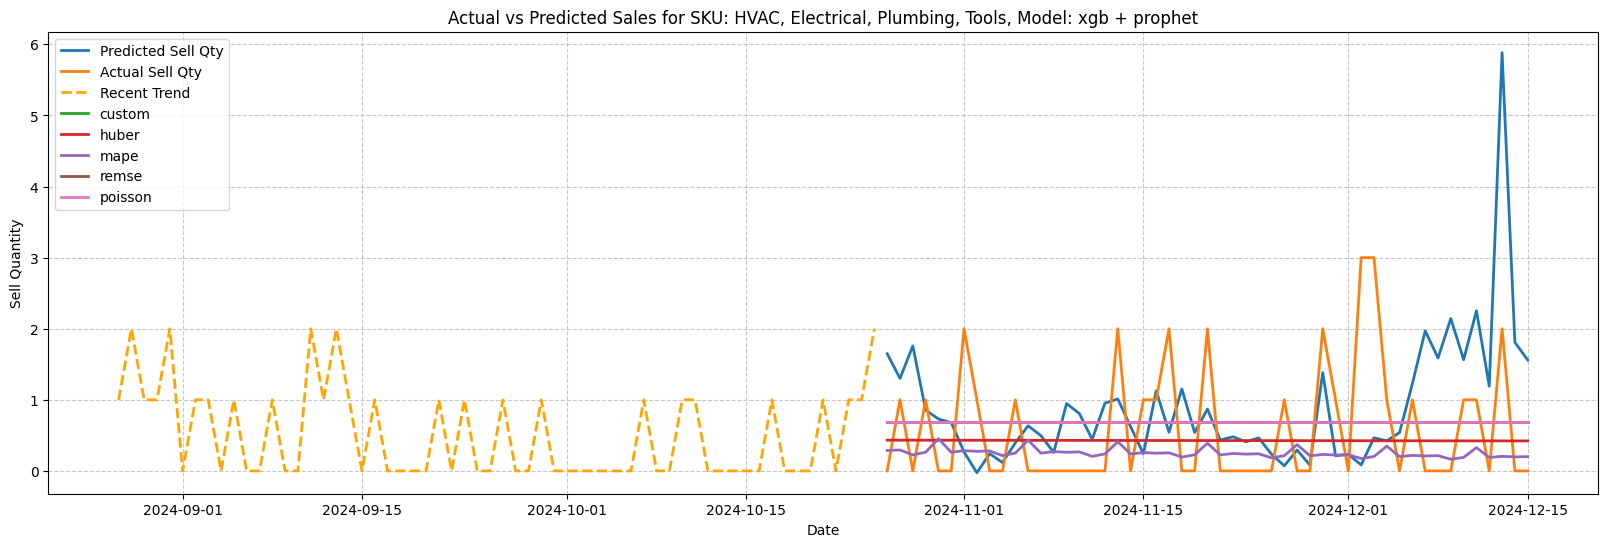

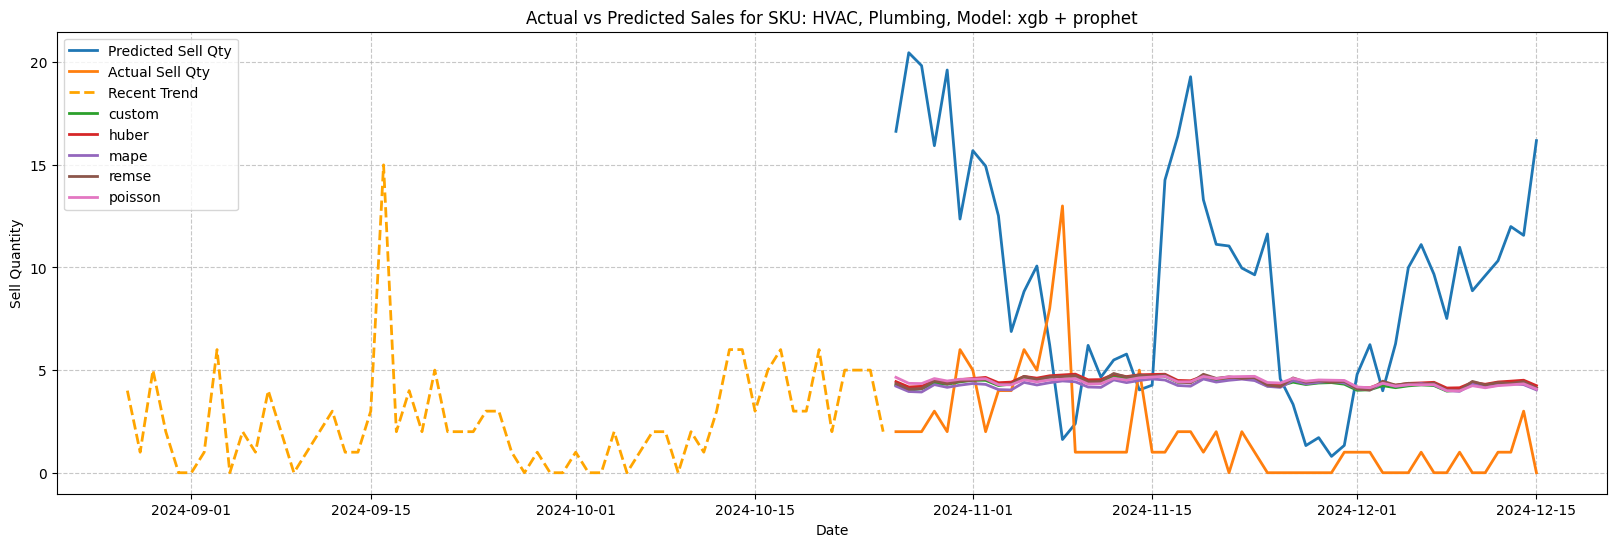

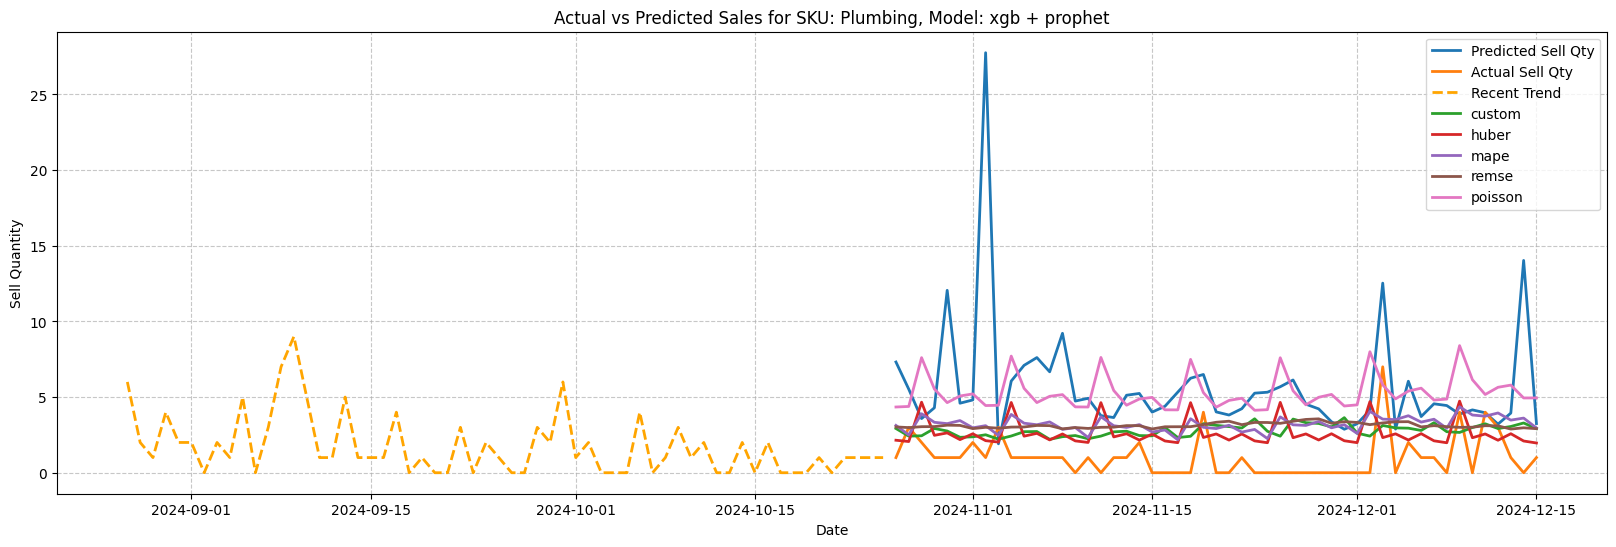

In [77]:
plot_predictions(train_df[train_df['sku'].isin(sku_to_model)].groupby(['type','purchase_date']).agg({'sell_qty':'sum'}).reset_index(),
                 type_sales, 'xgb + prophet', 'type')